In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy

In [2]:
data_arr = np.genfromtxt("../data/Close.csv", delimiter=',')
data_arr

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,  20.225,  20.858, ...,  47.72 ,  47.682,  47.295],
       [    nan,  22.355,  22.589, ...,  41.219,  40.509,  40.116],
       ...,
       [    nan,  18.69 ,  18.78 , ...,  27.525,  27.465,  27.088],
       [    nan, 303.66 , 301.2  , ...,  34.65 ,  31.5  ,  32.55 ],
       [    nan,  12.231,  12.305, ...,  14.463,  14.493,  14.532]])

In [3]:
data_arr = np.delete(np.delete(data_arr, 0, 0), 0, 1)
data_arr

array([[ 20.225 ,  20.858 ,  20.612 , ...,  47.72  ,  47.682 ,  47.295 ],
       [ 22.355 ,  22.589 ,  22.637 , ...,  41.219 ,  40.509 ,  40.116 ],
       [  9.3094,   9.1551,   9.0008, ...,  17.816 ,  17.388 ,  17.529 ],
       ...,
       [ 18.69  ,  18.78  ,  18.89  , ...,  27.525 ,  27.465 ,  27.088 ],
       [303.66  , 301.2   , 302.01  , ...,  34.65  ,  31.5   ,  32.55  ],
       [ 12.231 ,  12.305 ,  12.395 , ...,  14.463 ,  14.493 ,  14.532 ]])

### Task 0

In [4]:
def get_returns(data):
    temp = np.lib.stride_tricks.sliding_window_view(data, (1,2))
    lambda_returns = lambda x: x[..., 1] / x[..., 0]
    returns = lambda_returns(temp).reshape(data_arr.shape[0], data_arr.shape[1] - 1)
    return returns

In [5]:
def correct_wrong_values(data, scale):
    err_coord_low = np.where(get_returns(data) <= (1 / scale))
    err_coord_high = np.where(get_returns(data) >= scale)
    for i in range(len(err_coord_low[0])):
        id_low_0 = err_coord_low[0][i]
        id_low_1 = err_coord_low[1][i]
        
        id_high_0 = err_coord_high[0][i]
        id_high_1 = err_coord_high[1][i]

        if 0.5 < data[id_high_0][id_low_1] / data[id_high_0][id_high_1 + 1] < 2:        # if the price has dropped
            data[id_high_0][id_high_1] = data[id_high_0][id_high_1 + 1]

        if 0.5 < data[id_high_0][id_high_1] / data[id_high_0][id_low_1 + 1] < 2:        # If the price went up
            data[id_high_0][id_low_1] = data[id_high_0][id_low_1 + 1]

##### test 

In [6]:
data_returns = get_returns(data_arr)
data_returns

array([[1.0312979 , 0.98820596, 1.0034446 , ..., 0.99561861, 0.99920369,
        0.99188373],
       [1.01046746, 1.00212493, 0.98374343, ..., 0.99934539, 0.98277493,
        0.99029845],
       [0.98342536, 0.98314601, 1.00218869, ..., 1.00462389, 0.97597665,
        1.00810904],
       ...,
       [1.00481541, 1.00585729, 1.01508735, ..., 1.00728244, 0.99782016,
        0.98627344],
       [0.99189883, 1.00268924, 0.96923943, ..., 0.97058824, 0.90909091,
        1.03333333],
       [1.0060502 , 1.0073141 , 0.99596612, ..., 0.99724195, 1.00207426,
        1.00269095]])

In [9]:
scale = 9
print(np.where(get_returns(data_arr) >= scale)[0])
print(np.where(get_returns(data_arr) >= scale)[1])
print('correct wrong values')
correct_wrong_values(data_arr, scale)
print(np.where(get_returns(data_arr) >= scale)[0])
print(np.where(get_returns(data_arr) >= scale)[1])

[ 178  185  565  569  592  592  772 1315 1528 1657 1805 2144 2313]
[ 901  679 1046  255  177  747  273  566  154  305  855  982  903]
correct wrong values
[569 772]
[254 272]


### Task 1

In [12]:
def neutralize(alpha):
    return alpha - np.mean(alpha)

##### test

In [67]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('neutralize')
print(sum(neutralize(alpha)))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
neutralize
0.0


### Task 2

In [14]:
def normalize(alpha):
    return alpha / np.sum(alpha)

test

In [68]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('normalize')
print(sum(normalize(alpha)))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
normalize
1.0


### Task 3

In [64]:
def truncate(alpha, coef):
    max_weight = max(np.abs(alpha))
    signs = (alpha / np.abs(alpha))
    alpha[np.abs(alpha) > max_weight * coef] = max_weight * coef
    alpha = alpha * signs
    return alpha

In [19]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
coef = 0.9
print(alpha)
print('truncate')
print(truncate(alpha))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
truncate


NameError: name 'truncate' is not defined

### Task4

In [80]:
def get_returns(data):
    temp = np.lib.stride_tricks.sliding_window_view(data, (1,2))
    lambda_returns = lambda x: x[..., 1] / x[..., 0]
    returns = lambda_returns(temp).reshape(data_arr.shape[0], data_arr.shape[1] - 1)
    return returns

In [83]:
print(data_arr)
print('get_returns')
print(get_returns(data_arr))

[[ 20.225   20.858   20.612  ...  47.72    47.682   47.295 ]
 [ 22.355   22.589   22.637  ...  41.219   40.509   40.116 ]
 [  9.3094   9.1551   9.0008 ...  17.816   17.388   17.529 ]
 ...
 [ 18.69    18.78    18.89   ...  27.525   27.465   27.088 ]
 [303.66   301.2    302.01   ...  34.65    31.5     32.55  ]
 [ 12.231   12.305   12.395  ...  14.463   14.493   14.532 ]]
get_returns
[[1.0312979  0.98820596 1.0034446  ... 0.99561861 0.99920369 0.99188373]
 [1.01046746 1.00212493 0.98374343 ... 0.99934539 0.98277493 0.99029845]
 [0.98342536 0.98314601 1.00218869 ... 1.00462389 0.97597665 1.00810904]
 ...
 [1.00481541 1.00585729 1.01508735 ... 1.00728244 0.99782016 0.98627344]
 [0.99189883 1.00268924 0.96923943 ... 0.97058824 0.90909091 1.03333333]
 [1.0060502  1.0073141  0.99596612 ... 0.99724195 1.00207426 1.00269095]]


### Task5

In [12]:
def ranking(alpha):
    alpha = scipy.stats.rankdata(alpha, method='ordinal') / (len(alpha) - 1)
    return alpha

In [13]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('ranking')
print(ranking(alpha))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
ranking
[0.125 0.375 0.25  1.    0.5   0.625 0.75  0.875 1.125]


### Task 6

In [17]:
def cut_outliers(alpha, coef):
    alpha[alpha < np.quantile(alpha, coef)] = 0
    alpha[alpha > np.quantile(alpha, 1 - coef)] = 0
    return alpha

##### test


In [22]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
coef = 0.01
print(alpha)
print('cut_outliers')
print(cut_outliers(alpha, coef))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
cut_outliers
[ 0.   3.1  2.  10.   4.   5.   6.   7.  10.   0. ]


### Task 7


In [36]:
def cut_middle(alpha, eps):
    alpha[(alpha <= np.mean(alpha) + eps) & (alpha >= np.mean(alpha) - eps)] = 0
    return alpha

In [40]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
print(alpha)
eps = 1
print('cut_middle')
cut_middle(alpha, eps)
print(alpha)

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
cut_middle
[-11.    3.1   2.   10.    0.    0.    6.    7.   10.   12. ]


### Task 8

In [39]:
def apply_function(alpha, func):
    new_func = np.vectorize(func)
    return new_func(alpha)

test

In [43]:
def test_func(value):
    return np.log(np.sqrt(np.abs(value)) + 1) / np.pi

In [49]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
sign = alpha / abs(alpha)
print(alpha)
alpha = apply_function(alpha, test_func)
print(sign * (np.exp((alpha * np.pi)) - 1) ** 2)

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]


### anything

In [8]:
data_pd = pd.read_csv('../data/Close.csv').T
data_pd.drop(labels='Unnamed: 0', axis=0, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


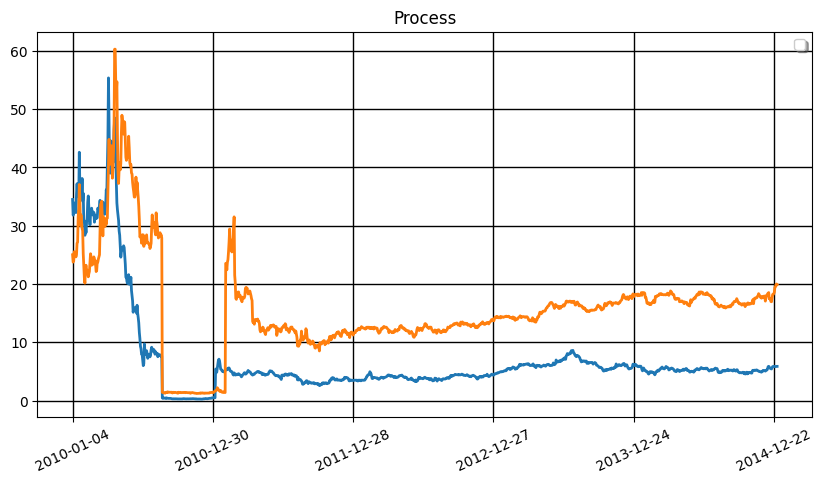

In [9]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()
ax.plot()
ax.plot(data_pd.index, data_arr[569], linewidth=2, label='')
ax.plot(data_pd.index, data_arr[772], linewidth=2, label='')

ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
plt.legend(loc = 'best', fancybox = True, shadow = True)


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(250))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY

plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'Process')
plt.show()